In [ ]:
#If the data shows a curvy trend, 
# then linear regression will not produce very accurate results when compared to a non-linear regression 
# we fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014.

In [1]:
# 1. Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

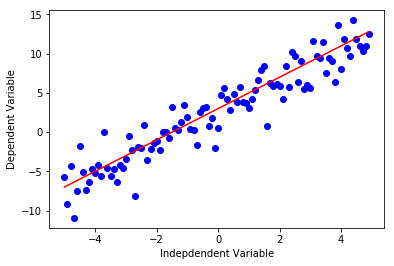

In [2]:
# Linear model
x = np.arange(-5.0, 5.0, 0.1)  # numpy.arange([start, ]stop, [step, ]dtype=None)
# start value -0.5, end value (not included) 5.0 and step value is 0.1


##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size) # genetate 10 random numbers x.size =100
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')  # plot x and y , blue circle 
plt.plot(x,y, 'r')    # plot x, y and red default line 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [4]:
x.size

100

In [3]:
# Example of np.arrange( )
np.arange(3)
#array([0, 1, 2])
# np.arange(3.0)
#array([ 0.,  1.,  2.])
#np.arange(3,7)
#array([3, 4, 5, 6])
# np.arange(3,7,2)
# array([3, 5])

array([0, 1, 2])

In [ ]:
# Non-linear regressions are a relationship between independent variables  𝑥  and a dependent variable  𝑦  which result
# in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear,
# and is usually represented by the polynomial of  𝑘  degrees (maximum power of  𝑥 ).

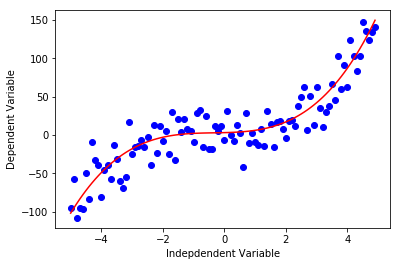

In [5]:
# Cubic function
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

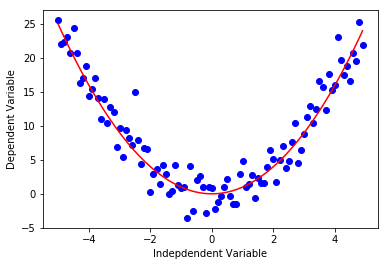

In [6]:
# Quadratice y= ax^2
x = np.arange(-5.0, 5.0, 0.1)  # generate an array with stat value -5 to end value 5.0 with space step value 0.1 sp x.size = 100

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2) # The quadratic function 
y_noise = 2 * np.random.normal(size=x.size)  # Why there is noise? 
ydata = y + y_noise
plt.plot(x, ydata,  'bo')  # plot figure with x, ydata and blue circle
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

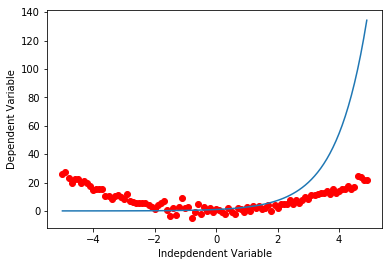

In [8]:
# Exponential: y= ax^n

X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)  # y= e^x
y_noise = 2 * np.random.normal(size=x.size)  # Why there is noise? 
ydata = y + y_noise
plt.plot(x, ydata,  'ro')  # plot figure with x, ydata and blue circle
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

C:\Users\cheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


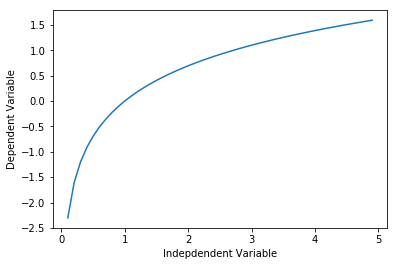

In [9]:
# Logarithmic: y= log(x)
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

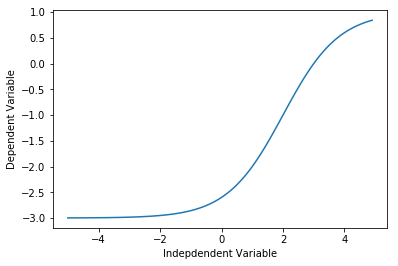

In [10]:
# Sigmoidal/Logistic : y= a+ b/(1+e^(X-d))
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))  # y= 1-  4/(1+3^(x-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


In [ ]:
# Non-Linear Regression example: we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014

In [13]:
1. Import library and getting data
import numpy as np
import pandas as pd

#downloading dataset
path="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv"
    
df = pd.read_csv(path)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


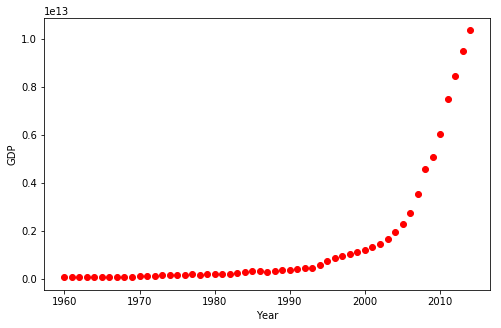

In [14]:
# Plotting the Dataset to see the initial look at the data
plt.figure(figsize=(8,5))  # plot.figure in matplotlib.pyplot.plot 
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro') # red circle = "ro"
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
# Choosing a model
# From an initial look at the plot, we determine that the logistic function could be a good approximation,
# since it has the property of 
#starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

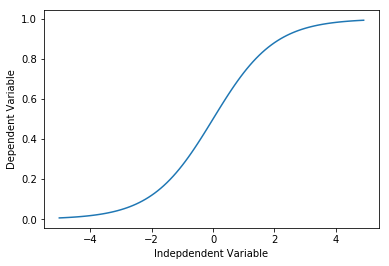

In [15]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))  # y= 1/(1+e^-x)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [ ]:
# 𝑌̂ =1/(1+𝑒^𝛽1(𝑋−𝛽2))
 
#𝛽1 : Controls the curve's steepness,

#𝛽2 : Slides the curve on the x-axis.

In [18]:
# Building The Model
def sigmoid(x, Beta_1, Beta_2):  # define a function sigmoid with 3 parameters , body of the logistic function and return with y
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

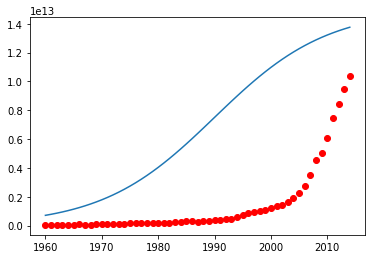

In [19]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [20]:
# Our task here is to find the best parameters for our model. Lets first normalize our x and y:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [ ]:
# How we find the best parameters for our fit line?
# we can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data. 
# Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

# popt are our optimized parameters.

In [21]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


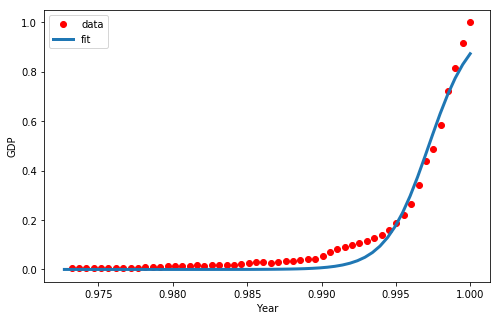

In [22]:
# Now we plot our resulting regression model.
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [23]:
# Calculate the  accuracy of our model
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.90


In [ ]:
# Very good model with small errors and big R^2 value ( close to 100% )